#Análisis pequeño antes del proceso de ML

En este cuaderno podras encontrar:
- Numero de peliculas que ha calificado cada usuario
- Distribución de las calificaciones
- Película que más calificaciones tiene
- Película que menos calificaciones tiene
- Película más vista


# Pasos básicos

In [ ]:
#cargamos las librerias 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

import gc #garbage collector

In [ ]:
#Cargamos nuestros datos 
df1 = pd.read_parquet('/content/drive/MyDrive/rating.parquet', columns=['userId', 'score', 'id'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024165 entries, 0 to 11024164
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   userId  int64  
 1   score   float64
 2   id      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 252.3+ MB


In [ ]:
df1.head(3)

,userId,score,id
0,1,1.0,as680
1,1,4.5,ns2186
2,1,5.0,hs2381


Hacemos algunos cambios para que sean más rápidos los calculos y que consuman los requisitos necesarios.

Como se puede observar pasamos de 252.3 MB a solo 147.2 MB solo con el cambio de tipo de variable.

In [ ]:
df1.userId=df1.userId.astype(np.int32)
df1.score=df1.score.astype(np.float16)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024165 entries, 0 to 11024164
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   userId  int32  
 1   score   float16
 2   id      object 
dtypes: float16(1), int32(1), object(1)
memory usage: 147.2+ MB


Utilizamos el label encoder como paso previo al ML debido a que la columna id que tiene el identificador de las películas tiene una combinación de carácteres y números, pero como se mencionó en ML se necesitan usar variables numéricas.

In [ ]:
#se carga la libreria 
from sklearn.preprocessing import LabelEncoder
columna = df1["id"]


# Crear un objeto LabelEncoder y ajustarlo a la columna
le = LabelEncoder()
le.fit(columna)

# Transformar la columna usando LabelEncoder
columna_transformada = le.transform(columna)

# Reemplazar la columna original con la columna transformada
df1["id"] = columna_transformada
df1.head(2)

,userId,score,id
0,1,1.0,6445
1,1,4.5,15510


In [ ]:
df1.score.unique()

array([1. , 4.5, 5. , 4. , 3.5, 2.5, 0.5, 3. , 2. , 1.5], dtype=float16)

In [ ]:
df1.userId.max()

270896

In [ ]:
df1.head()

,userId,score,id
0,1,1.0,6445
1,1,4.5,15510
2,1,5.0,12654
3,1,5.0,17151
4,1,5.0,9446


In [ ]:
df1.shape

(11024165, 3)

**Para saber a qué película corresponde cada calificación, debemos importar el dataset que aporta dicha información.**

In [ ]:
from pandas.io.parsers.c_parser_wrapper import is_index_col
df_title = pd.read_parquet('/content/drive/MyDrive/plataformas.parquet', columns=['id', 'title'])
df_title.set_index('id', inplace=True)
df_title.head()

,title
id,
as1,the grand seduction
as2,take care good night
as3,secrets of deception
as4,pink: staying true
as5,monster maker


In [ ]:
id = 'as680'
print(df_title.loc[id].title)

the english civil war


In [ ]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22998 entries, as1 to ns8807
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   22998 non-null  object
dtypes: object(1)
memory usage: 875.4+ KB


In [ ]:
# Convertir el índice en una columna
df_title.reset_index(inplace=True)

In [ ]:
df_title.head(2)

,id,title
0,as1,the grand seduction
1,as2,take care good night


Igual que en pasos anteriores aplicamos LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

columna = df_title["id"]


# Crear un objeto LabelEncoder y ajustarlo a la columna
le = LabelEncoder()
le.fit(columna)

# Transformar la columna usando LabelEncoder
columna_transformada = le.transform(columna)

# Reemplazar la columna original con la columna transformada
df_title["id"] = columna_transformada
df_title.head(5)

,id,title
0,0,the grand seduction
1,1111,take care good night
2,2222,secrets of deception
3,3333,pink: staying true
4,4444,monster maker


In [ ]:
df_title[df_title.id==6445]

,id,title
679,6445,the english civil war


In [ ]:
df_title.set_index('id', inplace=True)

In [ ]:
df_title.head(2)

,title
id,
0,the grand seduction
1111,take care good night


In [ ]:
id = 6445
print(df_title.loc[id].title)

the english civil war


In [ ]:
df_title.shape

(22998, 1)

In [ ]:
#Fuerza a que se lleve a cabo la recolección de elementos no utilizados.
gc.collect()

31

In [ ]:
#guardo este archivo para gradio
df_title.to_parquet('/content/drive/MyDrive/df_titleLabelEncoder.parquet')

- - -

# Datos importantes que se pueden obtener de los datos

Buscamos por usuario cuantas películas han visto y cuantas han calificado

In [ ]:
print(df1.shape)
df1.head()

(11024165, 3)


,userId,score,id
0,1,1.0,6445
1,1,4.5,15510
2,1,5.0,12654
3,1,5.0,17151
4,1,5.0,9446


In [ ]:
df1.dtypes

userId      int32
score     float16
id          int64
dtype: object

In [ ]:
# Usuarios únicos

print(len(df1['userId'].unique()))

115077


In [ ]:
df1.userId.min()

1

In [ ]:
df1.head(2)

,userId,score,id
0,1,1.0,6445
1,1,4.5,15510


In [ ]:
df1[df1.id==27]

,userId,score,id
31146,354,4.0,27
55089,573,3.5,27
72476,747,4.0,27
84767,850,3.0,27
88370,885,5.0,27
...,...,...,...
10944489,123603,4.0,27
10974323,123899,3.5,27
10988448,123999,4.0,27
11006771,124148,5.0,27


# Número de películas que ha calificado cada usuario

In [ ]:
# Numero de peliculas que ha calificado el usuario
df1_by_users = df1.groupby(['userId']).count()
df1_by_users.head(3)

,score,id
userId,,
1,27,27
2,22,22
3,10,10


Para poder observar la cantidad de calificaciones que se han dado hacemos un histograma

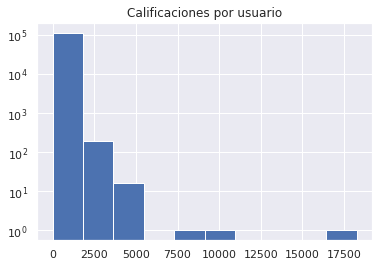

In [ ]:
plt.hist(df1_by_users.score, log= True)
plt.title('Calificaciones por usuario')
plt.show()

# Distribución de las calificaciones

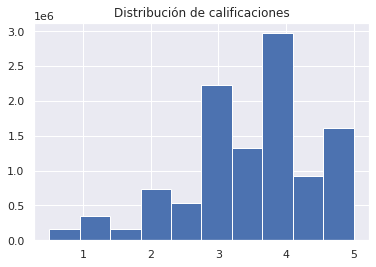

In [ ]:
# Observamos la distribución de las calificaciones
df1.score.hist()
plt.title('Distribución de calificaciones')
plt.show()

#Película que más calificaciones tiene




In [ ]:
#cuenta cuantos usarios tiene y cuantos raiting tuvo por id de pelicula
df1_by_movies = df1.groupby(['id']).count()
df1_by_movies.head()

,userId,score
id,,
0,502,502
1,513,513
2,430,430
3,485,485
4,469,469


In [ ]:
df1_by_movies.tail()

,userId,score
id,,
22993,447,447
22994,494,494
22995,475,475
22996,484,484
22997,479,479


In [ ]:
#pelicula con mas calificaciones
idx_max = df1_by_movies.userId.idxmax()
print(df_title.loc[idx_max].title)

from other worlds


#Película que menos calificaciones tiene

In [ ]:
# Pelicula con menos calificaciones
idx_min = df1_by_movies.userId.idxmin()
print(df_title.loc[idx_min].title)

mitzi (nbc 1968)


#Películas por popularidad

Se realiza un conteo mediante la agrupación por identificador de película y creando un nuevo dataframe con estos datos.

In [ ]:
df1_by_movies = df1.groupby(['id']).count()
df1_by_movies.sort_values('userId', ascending = False, inplace = True)
df1_by_movies['Vistos'] = df1_by_movies.userId
df1_by_movies.drop(columns = ['userId','score'], inplace = True)
df1_by_movies.head(10)

,Vistos
id,
3553,576
8962,560
8311,558
21168,558
6664,556
9410,556
12631,556
4321,554
13728,554


In [ ]:
df1_by_movies.tail()

,Vistos
id,
13746,404
20342,402
11910,401
15464,399
4379,396


In [ ]:
df_title.head(3)

,title
id,
0,the grand seduction
1111,take care good night
2222,secrets of deception


Se "agrupan" los titulos con los id

In [ ]:
df1_by_movies['Titulo'] = df_title.loc[df1_by_movies.index].title

# La película más vista

In [ ]:
df1_by_movies.head()

,Vistos,Titulo
id,,
3553,576,from other worlds
8962,560,the organization
8311,558,superbook
21168,558,"leapfrog: sing-along, read-along"
6664,556,sideways


In [ ]:
df1_by_movies.shape

(22998, 2)

Distribución de Vistas 

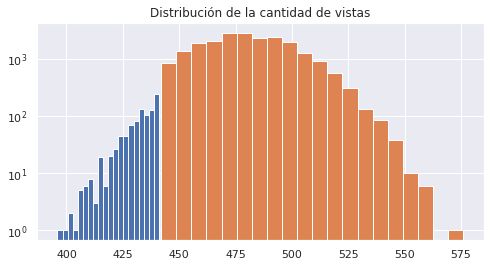

In [ ]:
plt.figure(figsize = (8,4))

df1_by_movies.Vistos[df1_by_movies.Vistos<442].hist(log = True, bins = 20)
plt.title('Distribución de la cantidad de vistas')
df1_by_movies.Vistos[df1_by_movies.Vistos>=442].hist(log = True, bins = 20)
plt.show()